##### Copyright 2021 The Cirq Developers

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# State Histograms
State Histograms are useful to visualize the output of running a quantum circuit. For details on how to create and run your own quantum circuits, please see [Cirq basics](../tutorials/basics)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/visualization/state_histograms>"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/master/docs/visualization/state_histograms.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/master/docs/visualization/state_histograms.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/visualization/state_histograms.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

In [1]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet --pre cirq
    print("installed cirq.")
    import cirq

### Basic Usage

/Users/tanujkhattar/quantum/Cirq/cirq/vis/state_histogram.py:103: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


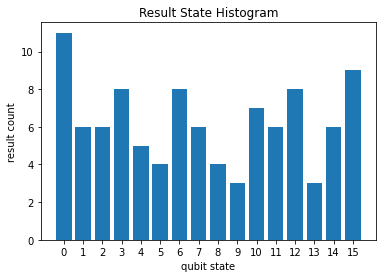

In [2]:
q = cirq.LineQubit.range(4)
circuit = cirq.Circuit([cirq.H.on_each(*q), cirq.measure(*q)])
result = cirq.Simulator().run(circuit, repetitions=100)
_ = cirq.vis.plot_state_histogram(result)

### Plotting circuits with sparse output
If the results have sparse output, you can use the `result.histogram` to compute the histogram and plot only states that have non-zero sample count. For eg:

#### Default Plot
The default call to `cirq.vis.plot_state_histogram` would plot all possible output states (including 0's). This can get messy, especially if the output is sparse.

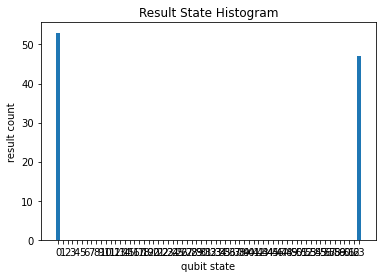

In [3]:
q = cirq.LineQubit.range(6)
circuit = cirq.Circuit([cirq.H(q[0]), [cirq.CNOT(q[0], q[i]) for i in range(1, 6, 1)], cirq.measure(*q, key='measure_all')])
result = cirq.Simulator().run(circuit, repetitions=100)
_ = cirq.vis.plot_state_histogram(result)

#### Sparse Plots
To plot only non-zero entries in the histogram, you can first compute a histogram using `result.histogram()` and pass it's result to `cirq.vis.plot_state_histogram`

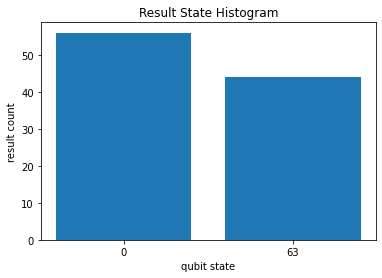

In [5]:
q = cirq.LineQubit.range(6)
circuit = cirq.Circuit([cirq.H(q[0]), [cirq.CNOT(q[0], q[i]) for i in range(1, 6, 1)], cirq.measure(*q, key='measure_all')])
result = cirq.Simulator().run(circuit, repetitions=100)
histogram = result.histogram(key = 'measure_all')
_ = cirq.vis.plot_state_histogram(histogram)

### Histogram for processed results.
`result.histogram()` also allows you to pass a `fold_func` parameter that can be used process the sampled measurement results and convert to a countable value to genrate a histogram.

As an example, suppose you want to plot a histogram of parity of number of times a `1` occurs in a measurement result. We can do this using `fold_func` as follows:

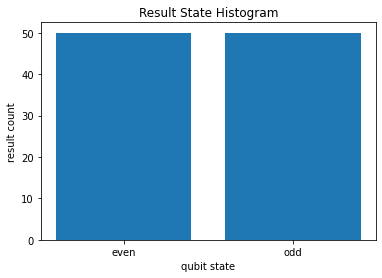

In [9]:
def count_ones(bits):
    return 'even' if sum(bits) % 2 == 0 else 'odd'

q = cirq.LineQubit.range(6)
# Uniform superposition over all 2 ** 6 states.
circuit = cirq.Circuit([cirq.H.on_each(*q), cirq.measure(*q, key='measure_all')])
result = cirq.Simulator().run(circuit, repetitions=100)
# Create a customized histogram by processing the measurement results using `fold_func`.
custom_histogram = result.histogram(key = 'measure_all', fold_func=count_ones)
# Plot the custom histogram using cirq.vis.plot_state_histogram
_ = cirq.vis.plot_state_histogram(custom_histogram)

### Modifying Plot Properties
You can pass additional arguments to the `cirs.vis.plot_state_histogram` method to modify plot properties like `title`, `xlabel`, `ylabel` and `tick_labels`. For eg:

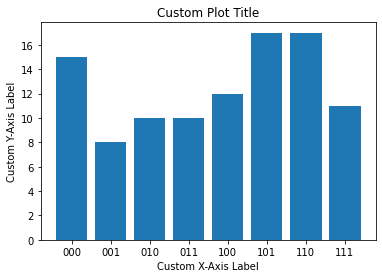

In [14]:
def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]

q = cirq.LineQubit.range(3)
circuit = cirq.Circuit([cirq.H.on_each(*q), cirq.measure(*q)])
result = cirq.Simulator().run(circuit, repetitions=100)
_ = cirq.vis.plot_state_histogram(result, title = 'Custom Plot Title', xlabel = 'Custom X-Axis Label', ylabel = 'Custom Y-Axis Label', tick_label=binary_labels(3))
